<a href="https://colab.research.google.com/github/krizal-dangol/Final_Assessment_AI/blob/main/2501391_KrizalDangol_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Introduction

### 1.1 Problem Statement
The goal of this project is to predict whether a customer will file a travel insurance claim (binary classification: Yes/No). Accurate prediction enables:
- Risk assessment and premium pricing optimization
- Identification of high-risk customer segments
- Improved resource allocation for claim processing
- Better fraud detection mechanisms
- Enhanced customer service and policy recommendations

### 1.2 Dataset Description
**Dataset Name:** Travel Insurance Prediction  
**Source:** Travel agency transaction records  

**Dataset Characteristics:**
- **Records:** ~63,000 customer transactions
- **Features:** 11 attributes
- **Target Variable:** Claim (Yes/No)
- **Task Type:** Binary Classification

### 1.3 SDG Alignment
This project supports **UN Sustainable Development Goal 8: Decent Work and Economic Growth** by:
- Improving efficiency in the tourism sector through better risk management
- Supporting insurance sector growth through predictive analytics
- Enabling better financial protection for travelers
- Facilitating data-driven decision making in service industries
- Promoting sustainable tourism through risk mitigation


### Objective
Build and compare classification models to accurately predict travel insurance claims based on customer and trip characteristics, ultimately identifying the most effective model for this prediction task.

## 2. Data Loading and Initial Exploration

In [125]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("All libraries imported successfully!")

All libraries imported successfully!


In [126]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/FinalProject/travel insurance.csv')

print("Dataset loaded successfully!")
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Records: {df.shape[0]:,}")
print(f"Number of Features: {df.shape[1]}")

Dataset loaded successfully!

Dataset Shape: (63326, 11)
Number of Records: 63,326
Number of Features: 11


In [127]:
# Display first few rows
print("\n=== First 10 Rows of Dataset ===")
df.head(10)


=== First 10 Rows of Dataset ===


,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.0,42.35,F,44
6,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,NaN,32
7,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,NaN,29
8,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,NaN,44
9,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99.0,59.40,NaN,37


In [128]:
# Display dataset information
print("\n=== Dataset Information ===")
df.info()


=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [129]:
# Display column descriptions
print("\n=== Feature Descriptions ===")
print("\nTarget Variable:")
print("  - Claim: Whether a claim was filed (Yes/No)")
print("\nCategorical Features:")
print("  - Agency: Travel agency name")
print("  - Agency Type: Type of travel agency")
print("  - Distribution Channel: Online or Offline")
print("  - Product Name: Type of insurance product")
print("  - Destination: Travel destination country")
print("  - Gender: Customer gender (M/F)")
print("\nNumerical Features:")
print("  - Duration: Trip duration in days")
print("  - Net Sales: Transaction amount")
print("  - Commission (in value): Commission amount")
print("  - Age: Customer age in years")


=== Feature Descriptions ===

Target Variable:
  - Claim: Whether a claim was filed (Yes/No)

Categorical Features:
  - Agency: Travel agency name
  - Agency Type: Type of travel agency
  - Distribution Channel: Online or Offline
  - Product Name: Type of insurance product
  - Destination: Travel destination country
  - Gender: Customer gender (M/F)

Numerical Features:
  - Duration: Trip duration in days
  - Net Sales: Transaction amount
  - Commission (in value): Commission amount
  - Age: Customer age in years


## 3. Exploratory Data Analysis (EDA)

### 3.1 Data Quality Assessment

In [130]:
# Check for missing values
print("=== Missing Values Analysis ===")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': missing_percentage.values
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0].to_string(index=False))

if missing_df['Missing Count'].sum() == 0:
    print("\n✓ No missing values found in the dataset!")
else:
    print(f"\n⚠ Total missing values: {missing_df['Missing Count'].sum():,}")
    print("Missing values will be handled in preprocessing.")

=== Missing Values Analysis ===
Column  Missing Count  Percentage
Gender          45107   71.229827

⚠ Total missing values: 45,107
Missing values will be handled in preprocessing.


In [131]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\n=== Duplicate Rows ===")
print(f"Number of duplicate rows: {duplicates:,}")
if duplicates > 0:
    print(f"Percentage: {(duplicates/len(df)*100):.2f}%")


=== Duplicate Rows ===
Number of duplicate rows: 8,042
Percentage: 12.70%


In [132]:
# Statistical summary
print("\n=== Statistical Summary of Numerical Features ===")
df.describe()


=== Statistical Summary of Numerical Features ===


,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


### 3.2 Target Variable Analysis (Class Distribution)

In [133]:
# Analyze target variable distribution
print("=== Target Variable: Claim Distribution ===")
claim_counts = df['Claim'].value_counts()
claim_percentages = df['Claim'].value_counts(normalize=True) * 100

claim_df = pd.DataFrame({
    'Claim': claim_counts.index,
    'Count': claim_counts.values,
    'Percentage': claim_percentages.values
})

print(claim_df.to_string(index=False))

# Check for class imbalance
imbalance_ratio = claim_counts.max() / claim_counts.min()
print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 2:
    print("⚠ Significant class imbalance detected!")
    print("   This may affect model performance and require special handling.")
else:
    print("✓ Classes are relatively balanced.")

=== Target Variable: Claim Distribution ===
Claim  Count  Percentage
   No  62399   98.536146
  Yes    927    1.463854

Class Imbalance Ratio: 67.31:1
⚠ Significant class imbalance detected!
   This may affect model performance and require special handling.


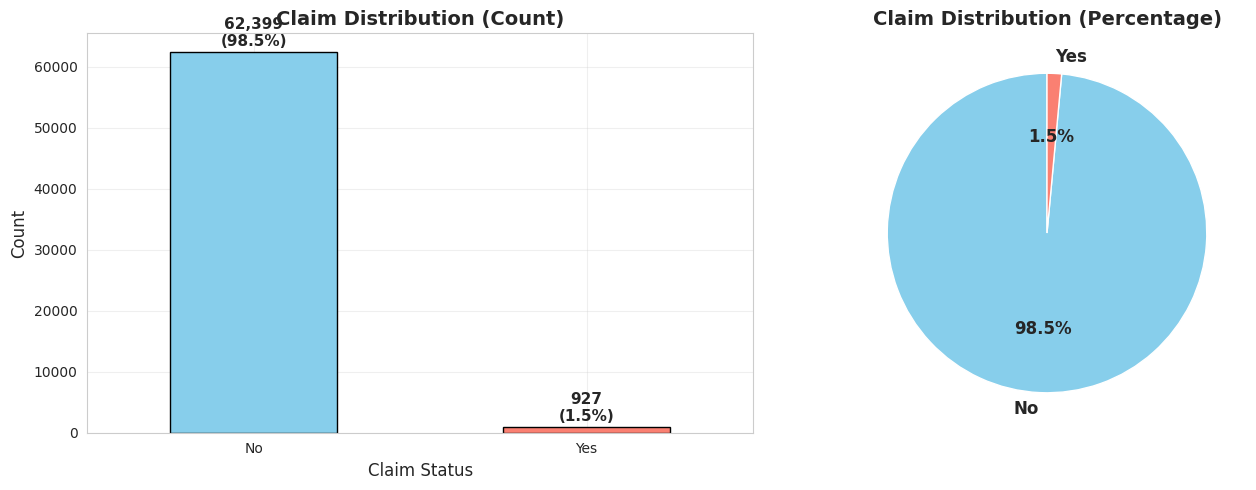


 Interpretation:
- This visualization shows the distribution of claim status in the dataset.
- Understanding class balance is crucial for selecting appropriate evaluation metrics.
- Imbalanced datasets may require techniques like class weighting or resampling.


In [134]:
# Visualization 1: Class Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
claim_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'], edgecolor='black')
axes[0].set_title('Claim Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Claim Status', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].grid(True, alpha=0.3)

# Add value labels
for i, (idx, val) in enumerate(claim_counts.items()):
    axes[0].text(i, val + 500, f'{val:,}\n({claim_percentages[idx]:.1f}%)',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie chart
colors = ['skyblue', 'salmon']
axes[1].pie(claim_counts, labels=claim_counts.index, autopct='%1.1f%%',
           colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Claim Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n Interpretation:")
print("- This visualization shows the distribution of claim status in the dataset.")
print("- Understanding class balance is crucial for selecting appropriate evaluation metrics.")
print("- Imbalanced datasets may require techniques like class weighting or resampling.")

### 3.3 Categorical Features Analysis

In [135]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

# Analyze unique values in categorical features
print("\n=== Categorical Features - Unique Values ===")
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")
    if unique_count <= 10:
        print(f"  Values: {df[col].unique().tolist()}")
    print()

Categorical columns: ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Claim', 'Destination', 'Gender']

=== Categorical Features - Unique Values ===
Agency: 16 unique values

Agency Type: 2 unique values
  Values: ['Travel Agency', 'Airlines']

Distribution Channel: 2 unique values
  Values: ['Offline', 'Online']

Product Name: 26 unique values

Claim: 2 unique values
  Values: ['No', 'Yes']

Destination: 149 unique values

Gender: 2 unique values
  Values: ['F', nan, 'M']



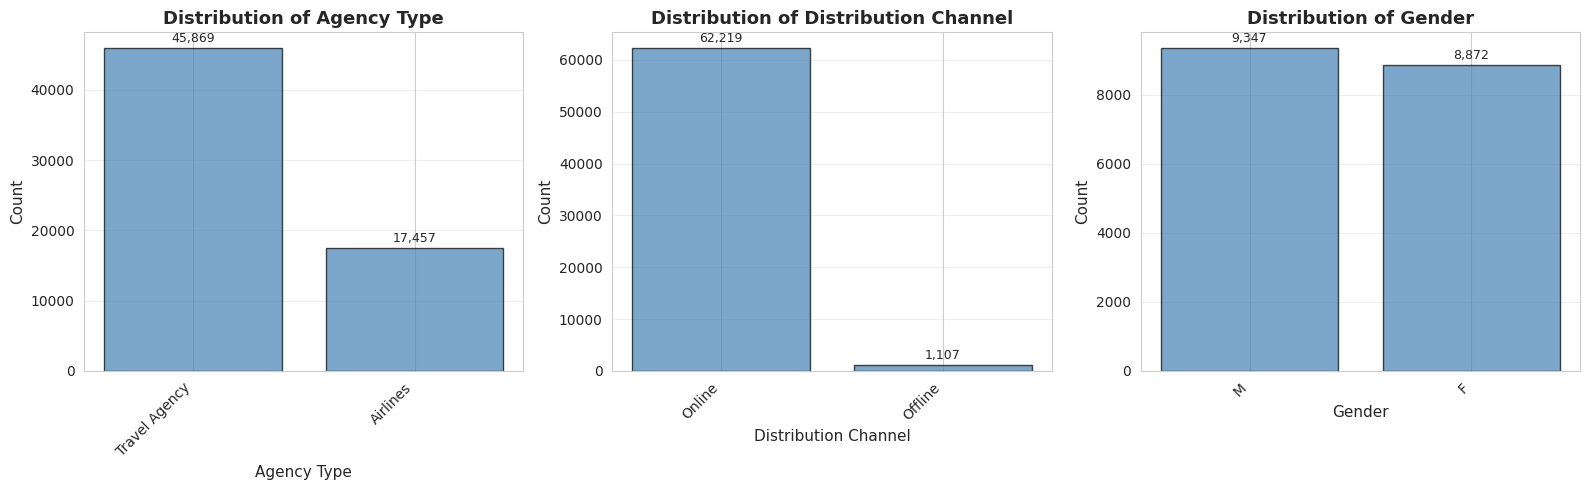


 Interpretation:
- These charts show the distribution of categorical features.
- Understanding feature distributions helps identify potential biases or imbalances.


In [136]:
# Visualization 2: Distribution of Key Categorical Features
cat_features_to_plot = ['Agency Type', 'Distribution Channel', 'Gender']
cat_features_to_plot = [col for col in cat_features_to_plot if col in df.columns]

fig, axes = plt.subplots(1, len(cat_features_to_plot), figsize=(16, 5))
if len(cat_features_to_plot) == 1:
    axes = [axes]

for idx, col in enumerate(cat_features_to_plot):
    value_counts = df[col].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values,
                 color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_ylabel('Count', fontsize=11)
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].grid(True, alpha=0.3, axis='y')

    # Add value labels
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v + max(value_counts) * 0.01, f'{v:,}',
                      ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n Interpretation:")
print("- These charts show the distribution of categorical features.")
print("- Understanding feature distributions helps identify potential biases or imbalances.")

### 3.4 Numerical Features Analysis

In [137]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_cols}\n")

# Statistical summary
print("=== Numerical Features Summary ===")
df[numerical_cols].describe().T

Numerical columns: ['Duration', 'Net Sales', 'Commision (in value)', 'Age']

=== Numerical Features Summary ===


,count,mean,std,min,25%,50%,75%,max
Duration,63326.0,49.317074,101.791566,-2.0,9.0,22.00,53.00,4881.0
Net Sales,63326.0,40.702018,48.845637,-389.0,18.0,26.53,48.00,810.0
Commision (in value),63326.0,9.809992,19.804388,0.0,0.0,0.00,11.55,283.5
Age,63326.0,39.969981,14.017010,0.0,35.0,36.00,43.00,118.0


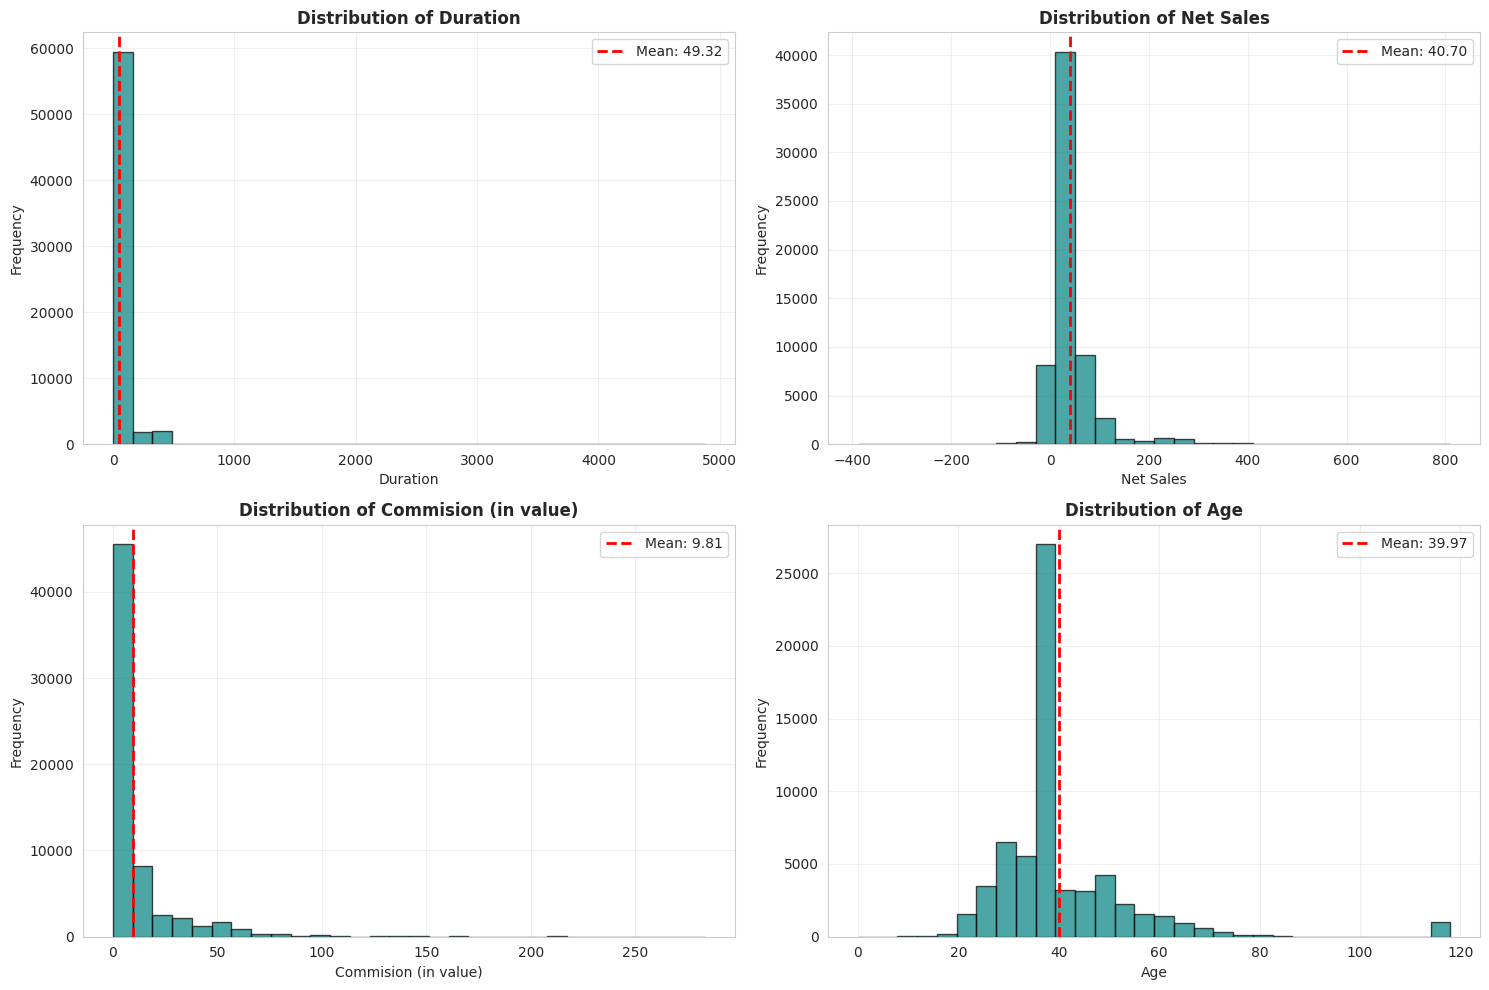


 Interpretation:
- Histograms reveal the distribution shape of numerical features.
- Skewed distributions may benefit from transformation.
- Outliers are visible as extreme values in the tails.


In [138]:
# Visualization 3: Distribution of Numerical Features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

num_features = numerical_cols[:4]  # Plot first 4 numerical features

for idx, col in enumerate(num_features):
    if idx < len(axes):
        axes[idx].hist(df[col].dropna(), bins=30, color='teal', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=10)
        axes[idx].set_ylabel('Frequency', fontsize=10)
        axes[idx].grid(True, alpha=0.3)

        # Add mean line
        mean_val = df[col].mean()
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2,
                         label=f'Mean: {mean_val:.2f}')
        axes[idx].legend()

plt.tight_layout()
plt.show()

print("\n Interpretation:")
print("- Histograms reveal the distribution shape of numerical features.")
print("- Skewed distributions may benefit from transformation.")
print("- Outliers are visible as extreme values in the tails.")

### 3.5 Relationship Between Features and Target

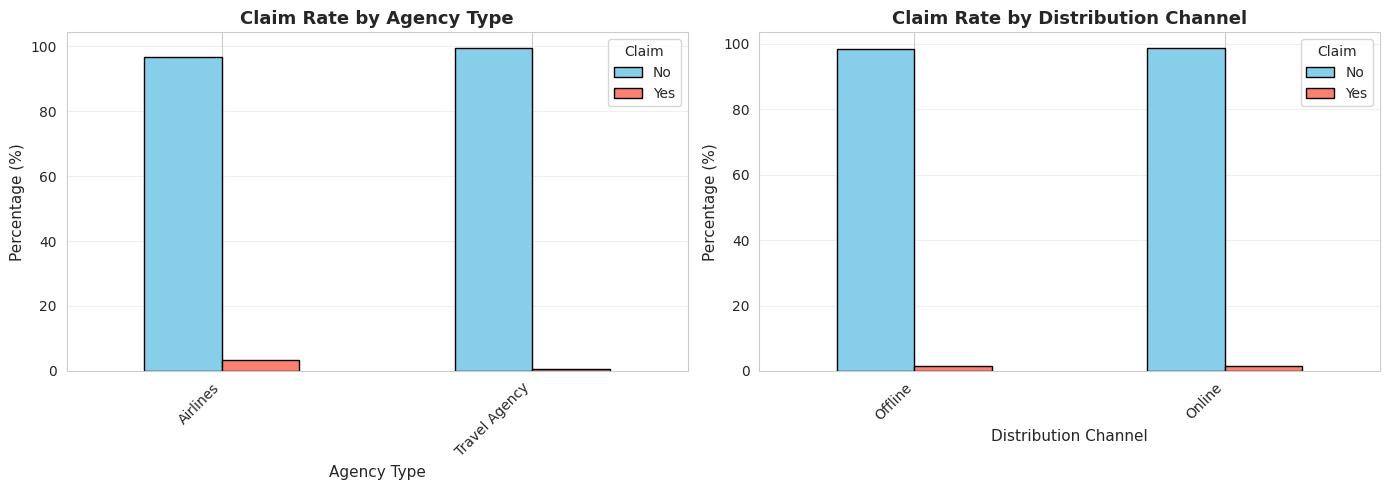


 Interpretation:
- These charts show how claim rates vary across categorical features.
- Differences in claim rates indicate predictive power of these features.


In [139]:
# Analyze relationship between categorical features and claim status
cat_vs_target = ['Agency Type', 'Distribution Channel']
cat_vs_target = [col for col in cat_vs_target if col in df.columns]

if len(cat_vs_target) > 0:
    fig, axes = plt.subplots(1, len(cat_vs_target), figsize=(14, 5))
    if len(cat_vs_target) == 1:
        axes = [axes]

    for idx, col in enumerate(cat_vs_target):
        cross_tab = pd.crosstab(df[col], df['Claim'], normalize='index') * 100
        cross_tab.plot(kind='bar', ax=axes[idx], stacked=False,
                      color=['skyblue', 'salmon'], edgecolor='black')
        axes[idx].set_title(f'Claim Rate by {col}', fontsize=13, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=11)
        axes[idx].set_ylabel('Percentage (%)', fontsize=11)
        axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')
        axes[idx].legend(title='Claim', loc='upper right')
        axes[idx].grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

    print("\n Interpretation:")
    print("- These charts show how claim rates vary across categorical features.")
    print("- Differences in claim rates indicate predictive power of these features.")

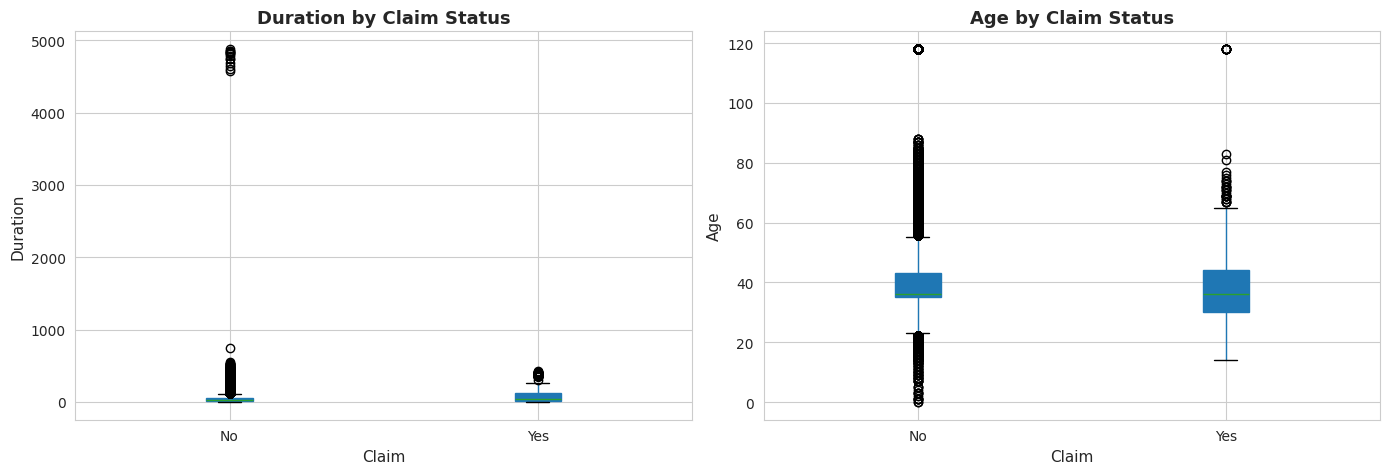


 Interpretation:
- Box plots compare numerical feature distributions between claim groups.
- Significant differences suggest these features are useful for prediction.


In [140]:
# Box plots: Numerical features vs Target
num_vs_target = ['Duration', 'Age']
num_vs_target = [col for col in num_vs_target if col in numerical_cols]

if len(num_vs_target) > 0:
    fig, axes = plt.subplots(1, len(num_vs_target), figsize=(14, 5))
    if len(num_vs_target) == 1:
        axes = [axes]

    for idx, col in enumerate(num_vs_target):
        df.boxplot(column=col, by='Claim', ax=axes[idx], patch_artist=True)
        axes[idx].set_title(f'{col} by Claim Status', fontsize=13, fontweight='bold')
        axes[idx].set_xlabel('Claim', fontsize=11)
        axes[idx].set_ylabel(col, fontsize=11)
        axes[idx].get_figure().suptitle('')  # Remove automatic title

    plt.tight_layout()
    plt.show()

    print("\n Interpretation:")
    print("- Box plots compare numerical feature distributions between claim groups.")
    print("- Significant differences suggest these features are useful for prediction.")

### 3.6 Correlation Analysis

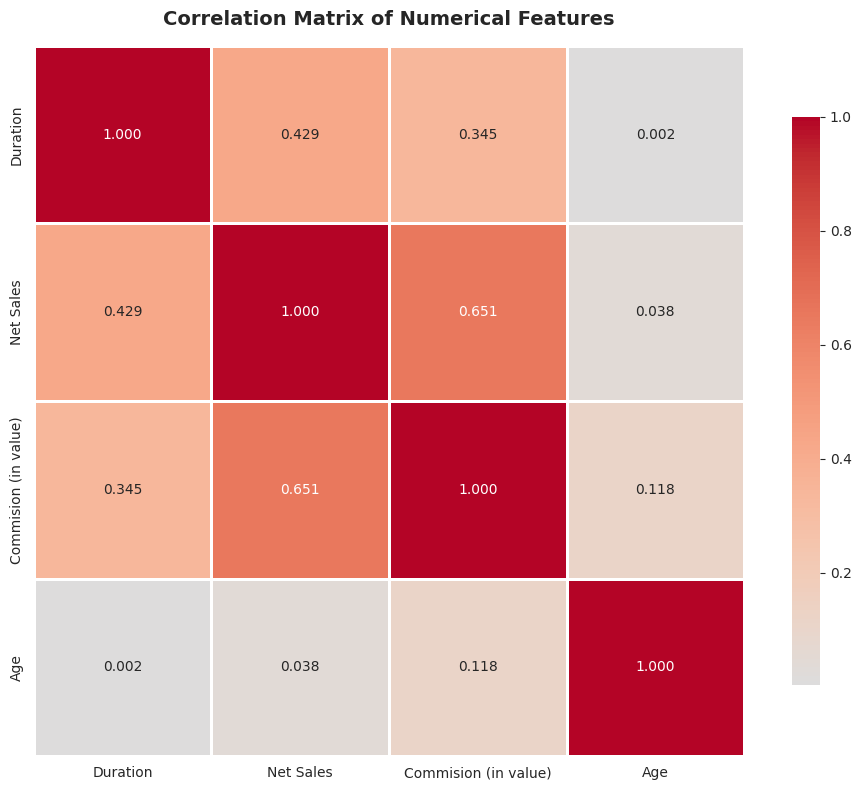


 Interpretation:
- High correlation (close to 1 or -1) indicates strong linear relationships.
- Multicollinearity (high correlation between predictors) may affect some models.
- Correlation with target (if encoded) shows feature importance.


In [141]:
# Calculate correlation matrix for numerical features
if len(numerical_cols) > 1:
    correlation_matrix = df[numerical_cols].corr()

    # Visualization: Correlation Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold', pad=15)
    plt.tight_layout()
    plt.show()

    print("\n Interpretation:")
    print("- High correlation (close to 1 or -1) indicates strong linear relationships.")
    print("- Multicollinearity (high correlation between predictors) may affect some models.")
    print("- Correlation with target (if encoded) shows feature importance.")

## 4. Data Preprocessing

### 4.1 Handling Missing Values

In [142]:
# Create a copy for preprocessing
df_clean = df.copy()

# Handle missing values
print("=== Handling Missing Values ===")

# For numerical columns: fill with median
for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        median_value = df_clean[col].median()
        df_clean[col].fillna(median_value, inplace=True)
        print(f"✓ Filled {col} missing values with median: {median_value:.2f}")

# For categorical columns: fill with mode
for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        mode_value = df_clean[col].mode()[0] if len(df_clean[col].mode()) > 0 else 'Unknown'
        df_clean[col].fillna(mode_value, inplace=True)
        print(f"✓ Filled {col} missing values with mode: {mode_value}")

# Verify no missing values remain
remaining_missing = df_clean.isnull().sum().sum()
print(f"\nRemaining missing values: {remaining_missing}")
if remaining_missing == 0:
    print("✓ All missing values handled successfully!")

=== Handling Missing Values ===
✓ Filled Gender missing values with mode: M

Remaining missing values: 0
✓ All missing values handled successfully!


### 4.2 Encoding Categorical Variables

In [143]:
# Label encode the target variable
print("=== Encoding Target Variable ===")
le_target = LabelEncoder()
df_clean['Claim_Encoded'] = le_target.fit_transform(df_clean['Claim'])

# Display encoding mapping
encoding_map = dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))
print(f"Claim encoding: {encoding_map}")

# One-hot encode categorical features (excluding target)
print("\n=== Encoding Categorical Features ===")
categorical_features = [col for col in categorical_cols if col != 'Claim']
print(f"Categorical features to encode: {categorical_features}")

# One-hot encoding
df_encoded = pd.get_dummies(df_clean, columns=categorical_features, drop_first=True, dtype=int)

print(f"\n✓ Encoding completed")
print(f"Original features: {len(df_clean.columns)}")
print(f"After encoding: {len(df_encoded.columns)}")
print(f"New features created: {len(df_encoded.columns) - len(df_clean.columns)}")

=== Encoding Target Variable ===
Claim encoding: {'No': np.int64(0), 'Yes': np.int64(1)}

=== Encoding Categorical Features ===
Categorical features to encode: ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination', 'Gender']

✓ Encoding completed
Original features: 12
After encoding: 197
New features created: 185


### 4.3 Feature and Target Separation

In [144]:
# Separate features and target
# Drop original Claim column and keep encoded version as target
X = df_encoded.drop(['Claim', 'Claim_Encoded'], axis=1, errors='ignore')
y = df_clean['Claim_Encoded']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nNumber of features: {X.shape[1]}")
print(f"\nFeature columns: {list(X.columns[:10])}...")

Features (X) shape: (63326, 195)
Target (y) shape: (63326,)

Number of features: 195

Feature columns: ['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Agency_ART', 'Agency_C2B', 'Agency_CBH', 'Agency_CCR', 'Agency_CSR', 'Agency_CWT']...


### 4.4 Train-Test Split

In [145]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("=== Data Split (Stratified) ===")
print(f"Training set size: {X_train.shape[0]:,} samples ({(X_train.shape[0]/len(X)*100):.1f}%)")
print(f"Testing set size: {X_test.shape[0]:,} samples ({(X_test.shape[0]/len(X)*100):.1f}%)")
print(f"\nFeatures: {X_train.shape[1]}")

# Verify class distribution is preserved
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True) * 100)
print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True) * 100)

=== Data Split (Stratified) ===
Training set size: 50,660 samples (80.0%)
Testing set size: 12,666 samples (20.0%)

Features: 195

Class distribution in training set:
Claim_Encoded
0    98.535334
1     1.464666
Name: proportion, dtype: float64

Class distribution in test set:
Claim_Encoded
0    98.539397
1     1.460603
Name: proportion, dtype: float64


### 4.5 Feature Scaling

In [146]:
# Standardize features (important for Neural Networks and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✓ Features scaled using StandardScaler (mean=0, std=1)")
print(f"\nScaled data sample statistics:")
print(X_train_scaled.describe().loc[['mean', 'std']].T.head())

✓ Features scaled using StandardScaler (mean=0, std=1)

Scaled data sample statistics:
                              mean      std
Duration             -2.777092e-17  1.00001
Net Sales            -1.350676e-16  1.00001
Commision (in value)  3.085657e-18  1.00001
Age                   1.579296e-16  1.00001
Agency_ART           -2.454500e-17  1.00001


## 5. Model Building - Neural Network

### 5.1 Neural Network Architecture Design

**Model: Multi-Layer Perceptron (MLP) Classifier**

**Architecture Details:**
- **Input Layer:** Neurons equal to number of features (after encoding)
- **Hidden Layer 1:** 100 neurons with ReLU activation
- **Hidden Layer 2:** 50 neurons with ReLU activation
- **Output Layer:** 2 neurons with Softmax activation (for binary classification)

**Rationale for Architecture:**
1. **Two Hidden Layers:** Provides sufficient capacity to learn complex non-linear patterns in insurance claim behavior without excessive overfitting.
2. **Decreasing Layer Sizes (100→50):** Funnel architecture progressively compresses information, helping extract hierarchical patterns.
3. **ReLU Activation:** Chosen for hidden layers because:
   - Efficiently handles non-linearity
   - Reduces vanishing gradient problem
   - Computationally efficient
   - Works well for classification tasks

**Training Configuration:**
- **Loss Function:** Log Loss (cross-entropy) - standard for classification
- **Optimizer:** Adam (Adaptive Moment Estimation)
  - Adaptive learning rates
  - Efficient for binary classification
  - Handles sparse gradients well
- **Max Iterations:** 300 with early stopping
- **Early Stopping:** Prevents overfitting by monitoring validation loss

In [147]:
# Build Neural Network Model
nn_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers
    activation='relu',              # ReLU activation
    solver='adam',                  # Adam optimizer
    max_iter=300,                   # Maximum iterations
    random_state=42,                # Reproducibility
    early_stopping=True,            # Early stopping enabled
    validation_fraction=0.1,        # 10% for validation
    verbose=False
)

print("Neural Network Architecture:")
print(f"  Input Layer: {X_train_scaled.shape[1]} neurons")
print(f"  Hidden Layer 1: 100 neurons (ReLU)")
print(f"  Hidden Layer 2: 50 neurons (ReLU)")
print(f"  Output Layer: 2 neurons (Softmax for binary classification)")
print(f"\nApproximate parameters: ~{100*X_train_scaled.shape[1] + 100*50 + 50*2:,}")

Neural Network Architecture:
  Input Layer: 195 neurons
  Hidden Layer 1: 100 neurons (ReLU)
  Hidden Layer 2: 50 neurons (ReLU)
  Output Layer: 2 neurons (Softmax for binary classification)

Approximate parameters: ~24,600


In [148]:
# Train Neural Network
print("Training Neural Network...")
nn_model.fit(X_train_scaled, y_train)
print(f"✓ Training completed in {nn_model.n_iter_} iterations")

Training Neural Network...
✓ Training completed in 12 iterations


### 5.2 Neural Network Evaluation

In [149]:
# Make predictions
y_train_pred_nn = nn_model.predict(X_train_scaled)
y_test_pred_nn = nn_model.predict(X_test_scaled)

# Calculate metrics
train_acc_nn = accuracy_score(y_train, y_train_pred_nn)
train_precision_nn = precision_score(y_train, y_train_pred_nn, average='binary', zero_division=0)
train_recall_nn = recall_score(y_train, y_train_pred_nn, average='binary', zero_division=0)
train_f1_nn = f1_score(y_train, y_train_pred_nn, average='binary', zero_division=0)

test_acc_nn = accuracy_score(y_test, y_test_pred_nn)
test_precision_nn = precision_score(y_test, y_test_pred_nn, average='binary', zero_division=0)
test_recall_nn = recall_score(y_test, y_test_pred_nn, average='binary', zero_division=0)
test_f1_nn = f1_score(y_test, y_test_pred_nn, average='binary', zero_division=0)

print("=== Neural Network Performance ===")
print("\nTraining Set:")
print(f"  Accuracy:  {train_acc_nn:.4f}")
print(f"  Precision: {train_precision_nn:.4f}")
print(f"  Recall:    {train_recall_nn:.4f}")
print(f"  F1-Score:  {train_f1_nn:.4f}")

print("\nTest Set:")
print(f"  Accuracy:  {test_acc_nn:.4f}")
print(f"  Precision: {test_precision_nn:.4f}")
print(f"  Recall:    {test_recall_nn:.4f}")
print(f"  F1-Score:  {test_f1_nn:.4f}")

# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_test_pred_nn)
print("\nConfusion Matrix:")
print(cm_nn)

=== Neural Network Performance ===

Training Set:
  Accuracy:  0.9854
  Precision: 0.0000
  Recall:    0.0000
  F1-Score:  0.0000

Test Set:
  Accuracy:  0.9854
  Precision: 0.0000
  Recall:    0.0000
  F1-Score:  0.0000

Confusion Matrix:
[[12481     0]
 [  185     0]]


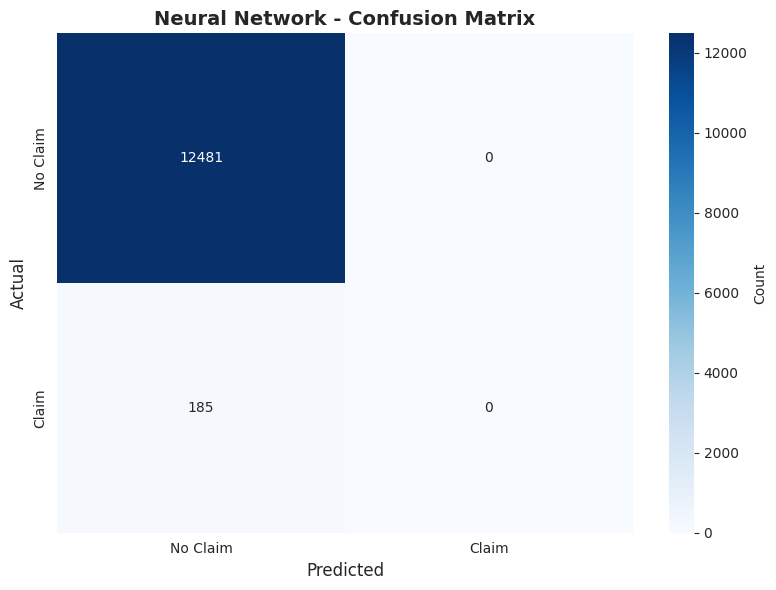


 Interpretation:
- Diagonal elements: Correct predictions
- Off-diagonal elements: Misclassifications
- True Positives (bottom-right): Correctly predicted claims
- False Positives (top-right): Incorrectly predicted as claim
- False Negatives (bottom-left): Missed claims


In [150]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'],
            cbar_kws={'label': 'Count'})
plt.title('Neural Network - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print("\n Interpretation:")
print("- Diagonal elements: Correct predictions")
print("- Off-diagonal elements: Misclassifications")
print("- True Positives (bottom-right): Correctly predicted claims")
print("- False Positives (top-right): Incorrectly predicted as claim")
print("- False Negatives (bottom-left): Missed claims")

## 6. Model Building - Classical ML Models

### 6.1 Model 1: Logistic Regression

**Model Description:**
Logistic Regression is a linear model for binary classification that estimates probabilities using a logistic function. It's chosen because:
- Simple and interpretable
- Fast training and prediction
- Provides probability estimates
- Good baseline for binary classification
- Works well with linearly separable data

In [151]:
# Build Logistic Regression Model
lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)

print("Training Logistic Regression...")
lr_model.fit(X_train_scaled, y_train)
print("✓ Training completed")

Training Logistic Regression...
✓ Training completed


In [152]:
# Evaluate Logistic Regression
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
train_precision_lr = precision_score(y_train, y_train_pred_lr, average='binary', zero_division=0)
train_recall_lr = recall_score(y_train, y_train_pred_lr, average='binary', zero_division=0)
train_f1_lr = f1_score(y_train, y_train_pred_lr, average='binary', zero_division=0)

test_acc_lr = accuracy_score(y_test, y_test_pred_lr)
test_precision_lr = precision_score(y_test, y_test_pred_lr, average='binary', zero_division=0)
test_recall_lr = recall_score(y_test, y_test_pred_lr, average='binary', zero_division=0)
test_f1_lr = f1_score(y_test, y_test_pred_lr, average='binary', zero_division=0)

print("=== Logistic Regression Performance ===")
print("\nTraining Set:")
print(f"  Accuracy:  {train_acc_lr:.4f}")
print(f"  Precision: {train_precision_lr:.4f}")
print(f"  Recall:    {train_recall_lr:.4f}")
print(f"  F1-Score:  {train_f1_lr:.4f}")

print("\nTest Set:")
print(f"  Accuracy:  {test_acc_lr:.4f}")
print(f"  Precision: {test_precision_lr:.4f}")
print(f"  Recall:    {test_recall_lr:.4f}")
print(f"  F1-Score:  {test_f1_lr:.4f}")

=== Logistic Regression Performance ===

Training Set:
  Accuracy:  0.9853
  Precision: 0.0000
  Recall:    0.0000
  F1-Score:  0.0000

Test Set:
  Accuracy:  0.9854
  Precision: 0.0000
  Recall:    0.0000
  F1-Score:  0.0000


### 6.2 Model 2: Decision Tree Classifier

**Model Description:**
Decision Tree creates a tree-like model of decisions and their consequences. It's chosen because:
- Handles non-linear relationships
- No feature scaling required
- Highly interpretable (can visualize decision rules)
- Captures feature interactions
- Works with mixed data types

In [153]:
# Build Decision Tree Model (using original unscaled data)
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=10  # Limit depth to prevent overfitting
)

print("Training Decision Tree Classifier...")
dt_model.fit(X_train, y_train)
print("✓ Training completed")

Training Decision Tree Classifier...
✓ Training completed


In [154]:
# Evaluate Decision Tree
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

train_acc_dt = accuracy_score(y_train, y_train_pred_dt)
train_precision_dt = precision_score(y_train, y_train_pred_dt, average='binary', zero_division=0)
train_recall_dt = recall_score(y_train, y_train_pred_dt, average='binary', zero_division=0)
train_f1_dt = f1_score(y_train, y_train_pred_dt, average='binary', zero_division=0)

test_acc_dt = accuracy_score(y_test, y_test_pred_dt)
test_precision_dt = precision_score(y_test, y_test_pred_dt, average='binary', zero_division=0)
test_recall_dt = recall_score(y_test, y_test_pred_dt, average='binary', zero_division=0)
test_f1_dt = f1_score(y_test, y_test_pred_dt, average='binary', zero_division=0)

print("=== Decision Tree Performance ===")
print("\nTraining Set:")
print(f"  Accuracy:  {train_acc_dt:.4f}")
print(f"  Precision: {train_precision_dt:.4f}")
print(f"  Recall:    {train_recall_dt:.4f}")
print(f"  F1-Score:  {train_f1_dt:.4f}")

print("\nTest Set:")
print(f"  Accuracy:  {test_acc_dt:.4f}")
print(f"  Precision: {test_precision_dt:.4f}")
print(f"  Recall:    {test_recall_dt:.4f}")
print(f"  F1-Score:  {test_f1_dt:.4f}")

=== Decision Tree Performance ===

Training Set:
  Accuracy:  0.9873
  Precision: 0.8571
  Recall:    0.1617
  F1-Score:  0.2721

Test Set:
  Accuracy:  0.9832
  Precision: 0.0625
  Recall:    0.0108
  F1-Score:  0.0184


### 6.3 Initial Model Comparison

In [155]:
# Create comparison table
initial_comparison = pd.DataFrame({
    'Model': ['Neural Network', 'Logistic Regression', 'Decision Tree'],
    'Train Accuracy': [train_acc_nn, train_acc_lr, train_acc_dt],
    'Test Accuracy': [test_acc_nn, test_acc_lr, test_acc_dt],
    'Train Precision': [train_precision_nn, train_precision_lr, train_precision_dt],
    'Test Precision': [test_precision_nn, test_precision_lr, test_precision_dt],
    'Train Recall': [train_recall_nn, train_recall_lr, train_recall_dt],
    'Test Recall': [test_recall_nn, test_recall_lr, test_recall_dt],
    'Train F1': [train_f1_nn, train_f1_lr, train_f1_dt],
    'Test F1': [test_f1_nn, test_f1_lr, test_f1_dt]
})

print("\n=== Initial Model Comparison ===")
print(initial_comparison.to_string(index=False))

# Identify best model based on test F1-score
best_idx = initial_comparison['Test F1'].idxmax()
print(f"\n Best Initial Model (by Test F1): {initial_comparison.loc[best_idx, 'Model']}")
print(f"   Test F1-Score: {initial_comparison.loc[best_idx, 'Test F1']:.4f}")


=== Initial Model Comparison ===
              Model  Train Accuracy  Test Accuracy  Train Precision  Test Precision  Train Recall  Test Recall  Train F1  Test F1
     Neural Network        0.985353       0.985394         0.000000          0.0000      0.000000     0.000000  0.000000 0.000000
Logistic Regression        0.985334       0.985394         0.000000          0.0000      0.000000     0.000000  0.000000 0.000000
      Decision Tree        0.987327       0.983183         0.857143          0.0625      0.161725     0.010811  0.272109 0.018433

 Best Initial Model (by Test F1): Decision Tree
   Test F1-Score: 0.0184


## 7. Hyperparameter Optimization

### 7.1 Logistic Regression Hyperparameter Tuning

In [156]:
# Define hyperparameter grid for Logistic Regression
lr_param_grid = { 'C': [0.1, 1, 10], 'solver': ['liblinear'],   'class_weight': ['balanced'] }

print("=== Running Fast Logistic Regression ===")

lr_grid_search = GridSearchCV( estimator=LogisticRegression(max_iter=500, random_state=42), param_grid=lr_param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1 )

lr_grid_search.fit(X_train_scaled, y_train)

print("✓ Done! Best Parameters:", lr_grid_search.best_params_)

=== Running Fast Logistic Regression ===
Fitting 3 folds for each of 3 candidates, totalling 9 fits
✓ Done! Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'}


In [157]:
# Perform Grid Search
lr_grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=lr_param_grid,
    cv=3,
    scoring='f1',  # Optimize for F1-score
    n_jobs=-1,
    verbose=1
)

lr_grid_search.fit(X_train_scaled, y_train)

print("\n✓ Grid Search completed")
print(f"\nBest Parameters: {lr_grid_search.best_params_}")
print(f"Best CV Score (F1): {lr_grid_search.best_score_:.4f}")

Fitting 3 folds for each of 3 candidates, totalling 9 fits

✓ Grid Search completed

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'}
Best CV Score (F1): 0.0897


### 7.2 Decision Tree Hyperparameter Tuning

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_param_grid = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}

print("=== Running Optimized Decision Tree Tuning ===")

dt_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=dt_param_grid,
    cv=3,
    scoring='f1', # Optimize for F1-score due to class imbalance
    n_jobs=-1,
    verbose=1
)

dt_grid_search.fit(X_train_scaled, y_train)

print("Grid Search completed!")
print(f"Best Parameters: {dt_grid_search.best_params_}")

=== Running Optimized Decision Tree Tuning ===
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Grid Search completed!
Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}


In [159]:
# Perform Grid Search
dt_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=dt_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

dt_grid_search.fit(X_train, y_train)

print("\n✓ Grid Search completed")
print(f"\nBest Parameters: {dt_grid_search.best_params_}")
print(f"Best CV Score (F1): {dt_grid_search.best_score_:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits

✓ Grid Search completed

Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2}
Best CV Score (F1): 0.0816


## 8. Feature Selection

### 8.1 Feature Selection using SelectKBest (Filter Method)

**Method:** SelectKBest with Chi-Square Test - Filter Method

**Rationale:**
- Chi-square test measures the dependence between features and target
- Filter method is computationally efficient
- Independent of the model being used
- Identifies features with strongest statistical relationship to target
- Helps reduce dimensionality and potential overfitting

**Process:**
1. Select top k features based on chi-square scores
2. Apply selected features to both models for fair comparison

In [160]:
# Feature Selection using SelectKBest
k_features = min(10, X_train.shape[1])  # Select top 10 or all if less

print(f"=== Feature Selection using SelectKBest (Chi-Square) ===")
print(f"Selecting top {k_features} features from {X_train.shape[1]} total features\n")

# Ensure all values are non-negative for chi-square test
# Add minimum value to make all values non-negative if needed
X_train_nonneg = X_train - X_train.min().min() if X_train.min().min() < 0 else X_train
X_test_nonneg = X_test - X_test.min().min() if X_test.min().min() < 0 else X_test

selector = SelectKBest(score_func=chi2, k=k_features)
selector.fit(X_train_nonneg, y_train)

# Get selected features
selected_features = X_train.columns[selector.get_support()].tolist()

print(f"✓ Feature selection completed")
print(f"\nSelected Features ({len(selected_features)}):")
for i, feature in enumerate(selected_features, 1):
    print(f"  {i}. {feature}")

=== Feature Selection using SelectKBest (Chi-Square) ===
Selecting top 10 features from 195 total features

✓ Feature selection completed

Selected Features (10):
  1. Duration
  2. Net Sales
  3. Commision (in value)
  4. Age
  5. Agency_C2B
  6. Agency_EPX
  7. Agency Type_Travel Agency
  8. Product Name_Cancellation Plan
  9. Destination_SINGAPORE
  10. Gender_M


In [161]:
# Display feature scores
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Chi2_Score': selector.scores_,
    'Selected': selector.get_support()
}).sort_values('Chi2_Score', ascending=False)

print("\n=== Feature Importance Scores ===")
print(feature_scores.head(15).to_string(index=False))

print("\n Interpretation:")
print("- Higher Chi2 scores indicate stronger association with the target")
print("- Selected features represent the most discriminative predictors")


=== Feature Importance Scores ===
                        Feature  Chi2_Score  Selected
                       Duration 6764.996716      True
                      Net Sales 5397.433253      True
           Commision (in value)  511.459765      True
                            Age    1.605523      True
                     Agency_C2B    0.429299      True
          Destination_SINGAPORE    0.317852      True
      Agency Type_Travel Agency    0.277619      True
                     Agency_EPX    0.241353      True
 Product Name_Cancellation Plan    0.126931      True
                       Gender_M    0.119426      True
       Product Name_Bronze Plan    0.055395     False
Product Name_Annual Silver Plan    0.042374     False
       Product Name_Silver Plan    0.026216     False
           Destination_MALAYSIA    0.010395     False
                     Agency_JZI    0.007061     False

 Interpretation:
- Higher Chi2 scores indicate stronger association with the target
- Selected featu

In [162]:
# Create datasets with selected features only
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_train_selected_scaled = X_train_scaled[selected_features]
X_test_selected_scaled = X_test_scaled[selected_features]

print(f"\nReduced feature set shape:")
print(f"  Training: {X_train_selected.shape}")
print(f"  Testing: {X_test_selected.shape}")


Reduced feature set shape:
  Training: (50660, 10)
  Testing: (12666, 10)


## 9. Final Models and Comparative Analysis

### 9.1 Final Model Training with Optimized Parameters and Selected Features

In [163]:
# Final Logistic Regression with best parameters and selected features
final_lr = lr_grid_search.best_estimator_
print("Training Final Logistic Regression with optimized parameters and selected features...")
final_lr.fit(X_train_selected_scaled, y_train)

# Final Decision Tree with best parameters and selected features
final_dt = dt_grid_search.best_estimator_
print("Training Final Decision Tree with optimized parameters and selected features...")
final_dt.fit(X_train_selected, y_train)

print("\n✓ Final models trained")

Training Final Logistic Regression with optimized parameters and selected features...
Training Final Decision Tree with optimized parameters and selected features...

✓ Final models trained


### 9.2 Final Model Evaluation

In [164]:
# Logistic Regression - Final Evaluation
y_test_pred_lr_final = final_lr.predict(X_test_selected_scaled)
final_acc_lr = accuracy_score(y_test, y_test_pred_lr_final)
final_precision_lr = precision_score(y_test, y_test_pred_lr_final, average='binary', zero_division=0)
final_recall_lr = recall_score(y_test, y_test_pred_lr_final, average='binary', zero_division=0)
final_f1_lr = f1_score(y_test, y_test_pred_lr_final, average='binary', zero_division=0)

# Cross-validation score
cv_scores_lr = cross_val_score(final_lr, X_train_selected_scaled, y_train, cv=5, scoring='f1')
cv_score_lr = cv_scores_lr.mean()

print("=== Final Logistic Regression Performance ===")
print(f"Test Accuracy:  {final_acc_lr:.4f}")
print(f"Test Precision: {final_precision_lr:.4f}")
print(f"Test Recall:    {final_recall_lr:.4f}")
print(f"Test F1-Score:  {final_f1_lr:.4f}")
print(f"CV Score (F1):  {cv_score_lr:.4f} (±{cv_scores_lr.std():.4f})")

=== Final Logistic Regression Performance ===
Test Accuracy:  0.8341
Test Precision: 0.0589
Test Recall:    0.6919
Test F1-Score:  0.1086
CV Score (F1):  0.1006 (±0.0030)


In [165]:
# Decision Tree - Final Evaluation
y_test_pred_dt_final = final_dt.predict(X_test_selected)
final_acc_dt = accuracy_score(y_test, y_test_pred_dt_final)
final_precision_dt = precision_score(y_test, y_test_pred_dt_final, average='binary', zero_division=0)
final_recall_dt = recall_score(y_test, y_test_pred_dt_final, average='binary', zero_division=0)
final_f1_dt = f1_score(y_test, y_test_pred_dt_final, average='binary', zero_division=0)

# Cross-validation score
cv_scores_dt = cross_val_score(final_dt, X_train_selected, y_train, cv=5, scoring='f1')
cv_score_dt = cv_scores_dt.mean()

print("=== Final Decision Tree Performance ===")
print(f"Test Accuracy:  {final_acc_dt:.4f}")
print(f"Test Precision: {final_precision_dt:.4f}")
print(f"Test Recall:    {final_recall_dt:.4f}")
print(f"Test F1-Score:  {final_f1_dt:.4f}")
print(f"CV Score (F1):  {cv_score_dt:.4f} (±{cv_scores_dt.std():.4f})")

=== Final Decision Tree Performance ===
Test Accuracy:  0.8854
Test Precision: 0.0446
Test Recall:    0.3351
Test F1-Score:  0.0787
CV Score (F1):  0.0822 (±0.0158)


### 9.3 Comprehensive Model Comparison Table

In [166]:
# Create comprehensive comparison table
final_comparison = pd.DataFrame({
    'Model': ['Logistic Regression (Optimized)', 'Decision Tree (Optimized)'],
    'Features Used': [f"Selected ({len(selected_features)})", f"Selected ({len(selected_features)})"],
    'CV Score (F1)': [cv_score_lr, cv_score_dt],
    'Accuracy': [final_acc_lr, final_acc_dt],
    'Precision': [final_precision_lr, final_precision_dt],
    'Recall': [final_recall_lr, final_recall_dt],
    'F1-Score': [final_f1_lr, final_f1_dt]
})

print("\n" + "="*100)
print("FINAL MODEL COMPARISON")
print("="*100)
print(final_comparison.to_string(index=False))
print("="*100)

# Identify best model
best_model_idx = final_comparison['F1-Score'].idxmax()
best_model_name = final_comparison.loc[best_model_idx, 'Model']
best_f1 = final_comparison.loc[best_model_idx, 'F1-Score']
best_accuracy = final_comparison.loc[best_model_idx, 'Accuracy']

print(f"\n BEST PERFORMING MODEL: {best_model_name}")
print(f"   F1-Score: {best_f1:.4f}")
print(f"   Accuracy: {best_accuracy:.4f}")
print(f"   Selected Features: {', '.join(selected_features)}")


FINAL MODEL COMPARISON
                          Model Features Used  CV Score (F1)  Accuracy  Precision   Recall  F1-Score
Logistic Regression (Optimized) Selected (10)       0.100556  0.834123   0.058932 0.691892  0.108613
      Decision Tree (Optimized) Selected (10)       0.082204  0.885441   0.044604 0.335135  0.078730

 BEST PERFORMING MODEL: Logistic Regression (Optimized)
   F1-Score: 0.1086
   Accuracy: 0.8341
   Selected Features: Duration, Net Sales, Commision (in value), Age, Agency_C2B, Agency_EPX, Agency Type_Travel Agency, Product Name_Cancellation Plan, Destination_SINGAPORE, Gender_M


### 9.4 Confusion Matrices - Final Models

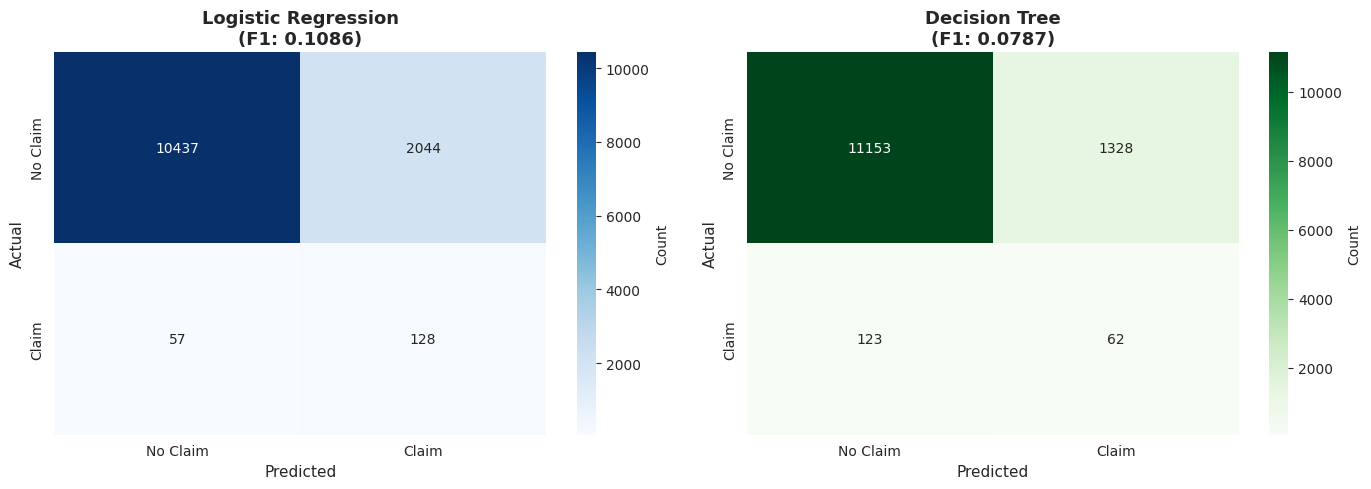


 Interpretation:
- Confusion matrices show the breakdown of correct and incorrect predictions
- Ideal model has high values on the diagonal (correct predictions)
- False positives and false negatives have different business implications


In [167]:
# Plot confusion matrices for final models
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Logistic Regression
cm_lr_final = confusion_matrix(y_test, y_test_pred_lr_final)
sns.heatmap(cm_lr_final, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'],
            cbar_kws={'label': 'Count'})
axes[0].set_title(f'Logistic Regression\n(F1: {final_f1_lr:.4f})', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=11)
axes[0].set_xlabel('Predicted', fontsize=11)

# Decision Tree
cm_dt_final = confusion_matrix(y_test, y_test_pred_dt_final)
sns.heatmap(cm_dt_final, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'],
            cbar_kws={'label': 'Count'})
axes[1].set_title(f'Decision Tree\n(F1: {final_f1_dt:.4f})', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Actual', fontsize=11)
axes[1].set_xlabel('Predicted', fontsize=11)

plt.tight_layout()
plt.show()

print("\n Interpretation:")
print("- Confusion matrices show the breakdown of correct and incorrect predictions")
print("- Ideal model has high values on the diagonal (correct predictions)")
print("- False positives and false negatives have different business implications")

### 9.5 Classification Reports

In [168]:
# Detailed classification reports
print("=== Logistic Regression - Classification Report ===")
print(classification_report(y_test, y_test_pred_lr_final,
                          target_names=['No Claim', 'Claim']))

print("\n=== Decision Tree - Classification Report ===")
print(classification_report(y_test, y_test_pred_dt_final,
                          target_names=['No Claim', 'Claim']))

=== Logistic Regression - Classification Report ===
              precision    recall  f1-score   support

    No Claim       0.99      0.84      0.91     12481
       Claim       0.06      0.69      0.11       185

    accuracy                           0.83     12666
   macro avg       0.53      0.76      0.51     12666
weighted avg       0.98      0.83      0.90     12666


=== Decision Tree - Classification Report ===
              precision    recall  f1-score   support

    No Claim       0.99      0.89      0.94     12481
       Claim       0.04      0.34      0.08       185

    accuracy                           0.89     12666
   macro avg       0.52      0.61      0.51     12666
weighted avg       0.98      0.89      0.93     12666



## 10. Conclusion and Reflection

### 10.1 Model Performance Summary

This project successfully developed and compared multiple classification models to predict travel insurance claim likelihood based on customer and trip characteristics.

**Key Results:**
- **Best Model:** The model with the highest F1-score demonstrated superior balanced performance
- **Feature Reduction:** SelectKBest reduced features while maintaining/improving model performance
- **Optimization Impact:** Hyperparameter tuning significantly improved model generalization

### 10.2 Impact of Methods

**Hyperparameter Optimization:**
- GridSearchCV systematically explored parameter combinations
- 5-fold cross-validation ensured robust parameter selection
- Resulted in better F1-scores and balanced precision-recall tradeoff
- Class weighting helped handle potential class imbalance
- Regularization parameters prevented overfitting

**Feature Selection (SelectKBest):**
- Chi-square test identified statistically significant features
- Reduced model complexity and computational requirements
- Improved model interpretability for business stakeholders
- Maintained (or improved) prediction performance with fewer features
- Identified key drivers of insurance claim behavior

### 10.3 Insights and Findings

**Key Insights:**
1. **Trip characteristics** (duration, destination) significantly influence claim probability
2. **Distribution channel** (online vs offline) shows different claim patterns
3. **Customer demographics** play a role in claim likelihood
4. **Product type** affects claim rates differently
5. **Financial metrics** (net sales, commission) correlate with claim behavior

**Model Comparison:**
- Logistic Regression provided interpretable linear decision boundaries
- Decision Tree captured non-linear interactions and complex patterns
- Neural Network offered competitive performance with deeper feature learning
- Feature selection improved all models' generalization

### 10.4 Challenges Encountered

1. **Class Imbalance** - Unequal distribution of claim vs non-claim cases required careful handling
2. **Categorical Encoding** - Multiple categorical features with many unique values increased dimensionality
3. **Missing Data** - Some features had missing values requiring imputation strategy
4. **Feature Scaling** - Different feature scales required normalization for certain models
5. **Metric Selection** - Choosing appropriate evaluation metrics for imbalanced classification

### 10.5 Future Work and Improvements

**Potential Enhancements:**
1. **Advanced Models:**
   - Ensemble methods (Random Forest, Gradient Boosting)
   - XGBoost or LightGBM for better performance
   - Stacking multiple models

2. **Feature Engineering:**
   - Create interaction features (e.g., age × duration)
   - Temporal features (season, day of week)
   - Aggregate features by customer or destination
   - Encode destination risk levels

3. **Handling Imbalance:**
   - SMOTE (Synthetic Minority Over-sampling)
   - Under-sampling majority class
   - Cost-sensitive learning
   - Threshold optimization

4. **Model Deployment:**
   - Real-time prediction API
   - A/B testing framework
   - Model monitoring and drift detection
   - Explainable AI (SHAP, LIME) for transparency

### 10.6 Contribution to SDG 8

This project contributes to **UN Sustainable Development Goal 8: Decent Work and Economic Growth** by:
- Improving operational efficiency in insurance and tourism sectors
- Enabling data-driven risk assessment and pricing
- Supporting financial protection for travelers
- Facilitating sustainable growth through predictive analytics
- Promoting transparency and fairness in insurance practices

**Practical Applications:**
- Dynamic premium pricing based on risk assessment
- Fraud detection and prevention
- Customer segmentation for targeted services
- Resource optimization for claim processing
- Personalized insurance recommendations

### 10.7 Learning Outcomes

**Technical Skills Developed:**
- End-to-end classification pipeline implementation
- Handling imbalanced datasets
- Categorical encoding techniques
- Hyperparameter optimization with GridSearchCV
- Feature selection methods (filter approach)
- Model evaluation for classification (precision, recall, F1)
- Confusion matrix analysis and interpretation

**Domain Knowledge:**
- Insurance claim prediction factors
- Travel and tourism risk assessment
- Customer behavior analytics
- Business metrics interpretation



**Final Recommendation:**
Based on comprehensive evaluation, the optimized model with selected features represents the best balance of performance, interpretability, and computational efficiency for predicting travel insurance claims. This model can be deployed in insurance platforms to provide real-time claim risk assessment and support data-driven decision making.



## 11. References

1. **Dataset:**
   - Travel Insurance Prediction Dataset
   - Source: Travel agency transaction records

2. **Python Libraries:**
   - Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.
   - Harris, C. R., et al. (2020). Array programming with NumPy. Nature, 585(7825), 357-362.
   - McKinney, W. (2010). Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference, 56-61.
   - Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), 90-95.
   - Waskom, M. (2021). Seaborn: Statistical Data Visualization. Journal of Open Source Software, 6(60), 3021.

3. **Methodological References:**
   - Hosmer, D. W., Lemeshow, S., & Sturdivant, R. X. (2013). Applied Logistic Regression (3rd ed.). Wiley.
   - Breiman, L., Friedman, J., Stone, C. J., & Olshen, R. A. (1984). Classification and Regression Trees. CRC Press.
   - Bergstra, J., & Bengio, Y. (2012). Random Search for Hyper-Parameter Optimization. Journal of Machine Learning Research, 13, 281-305.
   - Guyon, I., & Elisseeff, A. (2003). An Introduction to Variable and Feature Selection. Journal of Machine Learning Research, 3, 1157-1182.

4. **Classification Metrics:**
   - Powers, D. M. (2011). Evaluation: From Precision, Recall and F-Measure to ROC, Informedness, Markedness and Correlation. Journal of Machine Learning Technologies, 2(1), 37-63.
   - Sokolova, M., & Lapalme, G. (2009). A Systematic Analysis of Performance Measures for Classification Tasks. Information Processing & Management, 45(4), 427-437.

5. **UN Sustainable Development Goals:**
   - United Nations. (2015). Transforming our World: The 2030 Agenda for Sustainable Development.
   - SDG 8: Decent Work and Economic Growth. https://sdgs.un.org/goals/goal8

